In [224]:
import re
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd

In [392]:
# corpus=["the weather is hot under the sun",
#    "I make my hot chocolate with milk",
#    "one hot encoding",
#    "I will have a chai latte with milk",
#    "ther is a hot sale today"]
corpus = ['The cat sat on the mat',
          'The dog ran in the park',
          'The bird sang in the tree']

In [393]:
# re.sub('[^A-Za-z0-9]+','',corpus)

In [394]:
# def get_vocub(corpus):
#     data=[]
#     for sent in corpus:
#         for token in sent.split():
#             data.append(token.lower())
#     return data

# words=get_vocub(corpus)

In [395]:
# from tensorflow.keras.preprocessing.text import Tokenizer

# tokenizer=Tokenizer()

# tokenizer.fit_on_texts(corpus)

# sequences=tokenizer.texts_to_sequences(corpus)

# sequences

In [538]:
from nltk.tokenize import word_tokenize

token_sents=[word_tokenize(i.lower()) for i in corpus]

In [539]:
token_sents

[['the', 'cat', 'sat', 'on', 'the', 'mat'],
 ['the', 'dog', 'ran', 'in', 'the', 'park'],
 ['the', 'bird', 'sang', 'in', 'the', 'tree']]

In [540]:
flattened=[]
for sub in token_sents:
    for val in sub:
        flattened.append(val)
flattened

['the',
 'cat',
 'sat',
 'on',
 'the',
 'mat',
 'the',
 'dog',
 'ran',
 'in',
 'the',
 'park',
 'the',
 'bird',
 'sang',
 'in',
 'the',
 'tree']

In [541]:
vocab=[]
for token in flattened:
    if token not in vocab:
        vocab.append(token)

In [556]:
word_to_index={word:i for i,word in enumerate(vocab)}

In [557]:
word_to_index

{'the': 0,
 'cat': 1,
 'sat': 2,
 'on': 3,
 'mat': 4,
 'dog': 5,
 'ran': 6,
 'in': 7,
 'park': 8,
 'bird': 9,
 'sang': 10,
 'tree': 11}

In [558]:
vocab_size=len(vocab)
embed_size=100
window_size=2

In [559]:
targets=[]
contexts=[]
contexts_str=[]
targets_str=[]
for words in token_sents:
    print(words)
    for idx in range(window_size,len(words)-window_size):
        
        context=words[idx-window_size:idx]+ words[idx + 1:idx + window_size + 1]
        target=words[idx]
        
        contexts.append([word_to_index[i] for i in context])
        targets.append(word_to_index[target])
        
        contexts_str.append([i for i in context])
        targets_str.append(target)

['the', 'cat', 'sat', 'on', 'the', 'mat']
['the', 'dog', 'ran', 'in', 'the', 'park']
['the', 'bird', 'sang', 'in', 'the', 'tree']


In [560]:
contexts_str

[['the', 'cat', 'on', 'the'],
 ['cat', 'sat', 'the', 'mat'],
 ['the', 'dog', 'in', 'the'],
 ['dog', 'ran', 'the', 'park'],
 ['the', 'bird', 'in', 'the'],
 ['bird', 'sang', 'the', 'tree']]

In [561]:
contexts

[[0, 1, 3, 0],
 [1, 2, 0, 4],
 [0, 5, 7, 0],
 [5, 6, 0, 8],
 [0, 9, 7, 0],
 [9, 10, 0, 11]]

In [562]:
targets

[2, 3, 6, 7, 10, 7]

In [563]:
import numpy as np

In [564]:
X=np.array(contexts)

In [565]:
y=np.array(targets)

embedding layer ,lambda layer ,dense softmax layer 

In [566]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Lambda
from tensorflow import keras
import tensorflow as tf

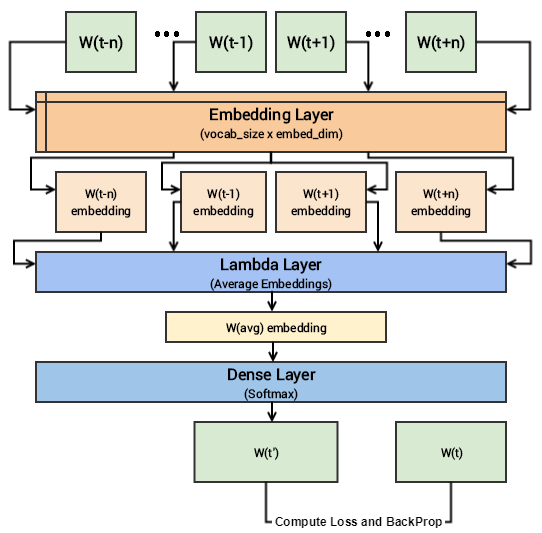

In [567]:
model=Sequential([
        #embid layer used to  turn positive indexes into dense vectors
    keras.layers.Embedding(input_dim=vocab_size,output_dim=embed_size,input_length=2*window_size),
    #input size=(input_dim X inputlength)
    #output size=(input_dim,output_dim)
    keras.layers.Lambda(lambda x: tf.reduce_mean(x,axis=1)),
    keras.layers.Dense(units=vocab_size,activation='softmax'),
])

# import keras.backend as K
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, Lambda
# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
# model.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
# model.add(Dense(vocab_size, activation='softmax'))

In [568]:
model.compile(keras.optimizers.RMSprop(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.compile('rmsprop','mse',metrics=['accuracy'])

In [572]:
history=model.fit(X,y,epochs=300,validation_split=0.5)

Epoch 1/300
1/1 [==============================] - 0s 93ms/step - loss: 4.1326e-06 - accuracy: 1.0000 - val_loss: 2.4848 - val_accuracy: 0.6667
Epoch 2/300
1/1 [==============================] - 0s 35ms/step - loss: 3.9736e-06 - accuracy: 1.0000 - val_loss: 2.4986 - val_accuracy: 0.6667
Epoch 3/300
1/1 [==============================] - 0s 37ms/step - loss: 3.8147e-06 - accuracy: 1.0000 - val_loss: 2.5112 - val_accuracy: 0.6667
Epoch 4/300
1/1 [==============================] - 0s 37ms/step - loss: 3.6160e-06 - accuracy: 1.0000 - val_loss: 2.5223 - val_accuracy: 0.6667
Epoch 5/300
1/1 [==============================] - 0s 36ms/step - loss: 3.4968e-06 - accuracy: 1.0000 - val_loss: 2.5330 - val_accuracy: 0.6667
Epoch 6/300
1/1 [==============================] - 0s 39ms/step - loss: 3.3379e-06 - accuracy: 1.0000 - val_loss: 2.5430 - val_accuracy: 0.6667
Epoch 7/300
1/1 [==============================] - 0s 36ms/step - loss: 3.2584e-06 - accuracy: 1.0000 - val_loss: 2.5527 - val_accuracy:

1/1 [==============================] - 0s 39ms/step - loss: 3.1789e-07 - accuracy: 1.0000 - val_loss: 3.0867 - val_accuracy: 0.6667
Epoch 114/300
1/1 [==============================] - 0s 40ms/step - loss: 3.1789e-07 - accuracy: 1.0000 - val_loss: 3.0887 - val_accuracy: 0.6667
Epoch 115/300
1/1 [==============================] - 0s 37ms/step - loss: 3.1789e-07 - accuracy: 1.0000 - val_loss: 3.0908 - val_accuracy: 0.6667
Epoch 116/300
1/1 [==============================] - 0s 36ms/step - loss: 3.1789e-07 - accuracy: 1.0000 - val_loss: 3.0928 - val_accuracy: 0.6667
Epoch 117/300
1/1 [==============================] - 0s 38ms/step - loss: 2.7815e-07 - accuracy: 1.0000 - val_loss: 3.0952 - val_accuracy: 0.6667
Epoch 118/300
1/1 [==============================] - 0s 37ms/step - loss: 2.3842e-07 - accuracy: 1.0000 - val_loss: 3.0977 - val_accuracy: 0.6667
Epoch 119/300
1/1 [==============================] - 0s 39ms/step - loss: 2.3842e-07 - accuracy: 1.0000 - val_loss: 3.1003 - val_accuracy:

1/1 [==============================] - 0s 41ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 3.2428 - val_accuracy: 0.6667
Epoch 226/300
1/1 [==============================] - 0s 41ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 3.2447 - val_accuracy: 0.6667
Epoch 227/300
1/1 [==============================] - 0s 39ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 3.2465 - val_accuracy: 0.6667
Epoch 228/300
1/1 [==============================] - 0s 39ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 3.2483 - val_accuracy: 0.6667
Epoch 229/300
1/1 [==============================] - 0s 58ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 3.2501 - val_accuracy: 0.6667
Epoch 230/300
1/1 [==============================] - 0s 39ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 3.2519 - val_accuracy: 0.6667
Epoch 231/300
1/1 [==============================] - 0s 38ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 3.2537 - val_accuracy:

In [573]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 4, 100)            1200      
                                                                 
 lambda_26 (Lambda)          (None, 100)               0         
                                                                 
 dense_26 (Dense)            (None, 12)                1212      
                                                                 
Total params: 2,412
Trainable params: 2,412
Non-trainable params: 0
_________________________________________________________________


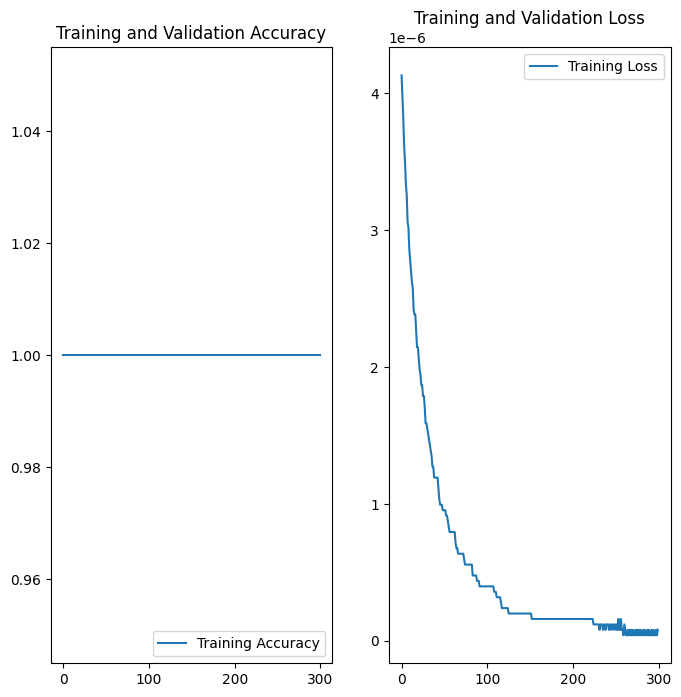

In [574]:
#doctor 
import matplotlib.pyplot as plt 

training_accuracy = history.history['accuracy']

training_loss = history.history['loss']

epochs_range=range(300)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [575]:
# xx=np.array([[0,2]])

# np.argmax(model.predict(xx))

In [576]:
embeddings=model.get_weights()[0]

In [577]:
embeddings.shape

(12, 100)

In [578]:
pd.DataFrame(embeddings,index=vocab)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
the,-0.042912,-0.058310,-0.206254,-0.299832,-0.244149,0.280955,-0.517117,0.140184,0.184692,-0.164881,...,-0.146030,0.351278,0.299759,-0.349606,-0.232434,-0.187796,-0.241144,0.545117,-0.221647,-0.402947
cat,0.188015,-0.504502,-0.499251,-0.548967,0.594179,0.511358,-0.224984,-0.536593,0.465733,0.496263,...,0.562320,-0.556041,-0.457210,-0.416204,-0.500814,-0.196753,-0.482909,0.384076,-0.470356,-0.492831
sat,-0.546849,0.153916,-0.442624,-0.455029,0.437035,0.401682,-0.545634,-0.361502,0.384047,0.459885,...,-0.576373,-0.476750,-0.573957,0.627509,-0.078063,0.556965,0.623476,0.557818,0.598531,-0.416920
on,0.607774,-0.566725,-0.590468,-0.446116,0.592281,0.543558,-0.065203,-0.576071,0.547197,0.553908,...,0.637492,-0.497555,0.544015,-0.549143,-0.563280,-0.533053,-0.561812,0.143762,-0.623484,-0.502921
mat,-0.617207,0.142868,-0.395099,-0.508292,0.479016,0.465735,-0.519658,-0.389004,0.420221,0.490899,...,-0.606946,-0.548558,-0.592544,0.602872,-0.052296,0.563729,0.542937,0.518994,0.549096,-0.465052
dog,-0.208437,-0.242329,0.333690,0.474465,-0.592979,-0.078086,-0.481637,0.517369,0.423224,-0.556001,...,-0.572345,0.543965,-0.485705,0.094309,-0.349070,0.035337,0.559296,0.525785,0.152366,0.497410
ran,0.538687,-0.542353,0.503733,0.498424,0.477701,-0.466797,0.568115,-0.500172,0.445157,-0.434170,...,0.492335,0.068687,-0.509043,0.506320,-0.515214,0.470799,-0.536118,-0.511077,0.464556,0.497790
in,-0.570794,0.483963,0.348881,-0.279108,-0.519630,-0.118790,-0.539701,0.518879,-0.267041,-0.538061,...,-0.553893,0.537949,0.443283,0.102257,0.433358,0.079294,0.272064,0.544606,0.398809,-0.374591
park,0.508067,-0.487186,0.485898,0.464562,0.495623,-0.500842,0.495815,-0.523653,0.431548,-0.493370,...,0.453905,0.146077,-0.468930,0.538696,-0.494911,0.474171,-0.514968,-0.502308,0.474571,0.518568
bird,0.245314,0.320245,0.287618,-0.310362,0.055213,-0.278271,0.221052,-0.190895,-0.356580,-0.271368,...,-0.265878,0.313322,0.090146,0.300079,0.230072,0.294133,-0.274589,-0.294514,0.251463,-0.270001


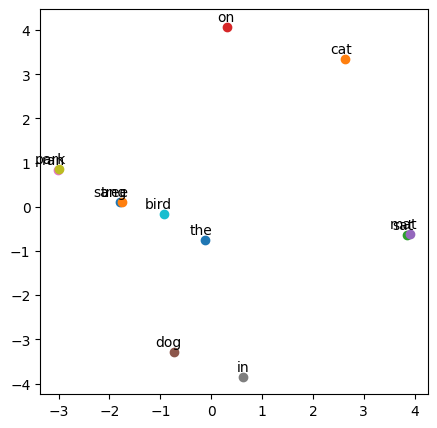

In [579]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
 
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for word,i in word_to_index.items():
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()